##5(a)

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [0]:
def sampler1():
  return np.random.uniform(-1,1)

def sampler2():
  if (random.choice((0,1))):
    return np.random.uniform(-3,-2)
  else:
    return np.random.uniform(2,3)

In [0]:
n = 100
x1_x = []
x1_y = []
x2_x = []
x2_y = []
for i in range(n):
  x1_x.append(sampler1())
  x1_y.append(x1_x[i]**2)
  x2_x.append(sampler2())
  x2_y.append(x2_x[i]**2)

samp_y = [0]*100

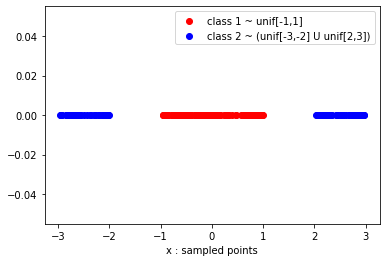

In [14]:
plt.scatter(x1_x,samp_y,color='red',label='class 1 ~ unif[-1,1]')
plt.scatter(x2_x,samp_y,color='blue',label='class 2 ~ (unif[-3,-2] U unif[2,3])')
plt.xlabel('x : sampled points')
plt.legend()
plt.savefig('5a.png')


##Part b

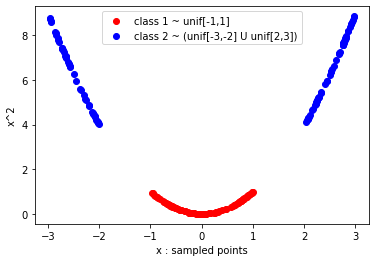

In [15]:
plt.scatter(x1_x,x1_y,color='red',label='class 1 ~ unif[-1,1]')
plt.scatter(x2_x,x2_y,color='blue',label='class 2 ~ (unif[-3,-2] U unif[2,3])')
plt.xlabel('x : sampled points')
plt.ylabel('x^2')
plt.legend()
plt.savefig('5b.png')

##Part c

In [0]:
m1_x = np.mean(np.array(x1_x))
m1_y = np.mean(np.array(x1_y))
m2_x = np.mean(np.array(x2_x))
m2_y = np.mean(np.array(x2_y))

In [17]:
print(m1_x,m1_y)
print(m2_x,m2_y)

0.024682487053652877 0.3596882240383143
0.3162894881489434 6.378651063431673


In [0]:
m1 = np.array([[m1_x],[m1_y]])
m2 = np.array([[m2_x],[m2_y]])
#calculating Sw

Sw1 = np.zeros((2,2),dtype=float)
Sw2 = np.zeros((2,2),dtype=float)

for i in range(n):
  x = np.array([[x1_x[i]],[x1_y[i]]])
  Sw1 = Sw1 + np.matmul((x-m1),(x-m1).T)
for i in range(n):
  x = np.array([[x2_x[i]],[x2_y[i]]])
  Sw2 = Sw2 + np.matmul((x-m2),(x-m2).T)

In [0]:
Sw = Sw1 + Sw2

In [20]:
Sw  

array([[663.7691022 ,  28.29529368],
       [ 28.29529368, 239.79700036]])

In [0]:
w = np.matmul(np.linalg.inv(Sw),(m1-m2))

In [22]:
w[1][0]

-0.025175034360607727

In [0]:
#x_plot = np.linspace(-3,3,1000)
y_plot1 = []
for i in range(100):
  ar = np.array([[x1_x[i]],[x1_y[i]]])
  res = np.matmul(w.T,ar)
  y_plot1.append(res)
y_plot2 = []
for i in range(100):
  ar = np.array([[x2_x[i]],[x2_y[i]]])
  res = np.matmul(w.T,ar)
  y_plot2.append(res)

In [24]:

y_plotf1 = []
y_plotf2 = []
for i in range(100):
  y_plotf1.append(float(y_plot1[i][0]))
  y_plotf2.append(float(y_plot2[i][0]))
y_plotf2

[-0.1975983308542036,
 -0.15928959191155173,
 -0.10626146273777903,
 -0.12703048068272815,
 -0.21845702056421817,
 -0.1293290345075133,
 -0.19701630301164572,
 -0.20022719976790224,
 -0.16680808193176105,
 -0.10673226109613236,
 -0.18985681851866357,
 -0.17199697569788547,
 -0.19399354725429338,
 -0.12453857858177375,
 -0.2061388802714486,
 -0.21273879389815298,
 -0.1302835300988625,
 -0.16145666532538624,
 -0.15902264736593918,
 -0.19887898098213797,
 -0.12181461939739532,
 -0.12307343478577537,
 -0.18933184411299342,
 -0.11696601773356088,
 -0.10492727346227741,
 -0.10844662967563622,
 -0.11432982959946807,
 -0.13616664042738993,
 -0.13505973003975352,
 -0.10414296856693486,
 -0.14532640110570377,
 -0.18781433604464645,
 -0.18918608557751188,
 -0.11625472725302492,
 -0.14139798359249328,
 -0.17246301915545004,
 -0.2095273212566205,
 -0.1481929547004195,
 -0.12415260893031282,
 -0.1263979281162067,
 -0.14289739267597842,
 -0.17806660236851937,
 -0.19102570997542062,
 -0.17992596935405

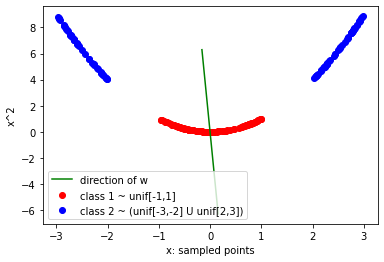

In [32]:
p1_x = -3
p1_y = 0
p2_x = 3
p2_y = (w[0][0]/w[1][0])*3

point1 = [-250*w[0][0],-250*w[1][0]]
point2 = [250*w[0][0],250*w[1][0]]
xval = [point1[0],point2[0]]
yval = [point1[1],point2[1]]
plt.plot(xval,yval,color='green',label='direction of w')


#plt.scatter(x1_x,y_plotf1,color='green')
#plt.scatter(x2_x,y_plotf2,color='green')
plt.scatter(x1_x,x1_y,color='red',label='class 1 ~ unif[-1,1]')
plt.scatter(x2_x,x2_y,color='blue',label='class 2 ~ (unif[-3,-2] U unif[2,3])')
plt.xlabel('x: sampled points')
plt.ylabel('x^2')
plt.legend()
plt.savefig('5c.png')

In [33]:
w

array([[ 0.00063385],
       [-0.02517503]])

##Part (d)
refer to 2nd notebook